In [19]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#lendo o arquivo Excel
arquivo = 'Case.xlsx'

In [3]:
# importando a planilha Base do arquivo Excel
df = pd.read_excel(arquivo, sheet_name='Base')

In [4]:
#Lendo as primeiras linhas do DataFrame
df.head()

,Aluno,Transação,Produto,Forma Pagamento,Num Parcela Atual,Total Parcelas a Pagar,Valor Pago (nessa parcela),Data Compra
0,Aluno1,HP033154662,Excel,BoletoBancario,1,1,597.00,2019-01-04
1,Aluno2,HP131154688,Excel,CartaoDeCredito,1,1,696.96,2019-01-07
2,Aluno3,HP109154696,Excel,CartaoDeCredito,1,1,792.65,2019-01-08
3,Aluno4,HP185154697,Excel,CartaoDeCredito,1,1,696.96,2019-01-08
4,Aluno5,HP133154697,Excel,CartaoDeCredito,1,1,696.99,2019-01-08


In [5]:
#Exibindo informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71005 entries, 0 to 71004
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Aluno                       71005 non-null  object        
 1   Transação                   71005 non-null  object        
 2   Produto                     71005 non-null  object        
 3   Forma Pagamento             71005 non-null  object        
 4   Num Parcela Atual           71005 non-null  int64         
 5   Total Parcelas a Pagar      71005 non-null  int64         
 6   Valor Pago (nessa parcela)  71005 non-null  float64       
 7   Data Compra                 71005 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.3+ MB


In [6]:
#Exibindo estatísticas descritivas do DataFrame
df.describe()

,Num Parcela Atual,Total Parcelas a Pagar,Valor Pago (nessa parcela),Data Compra
count,71005.000000,71005.000000,71005.000000,71005
mean,2.620083,3.133681,402.722066,2020-11-16 14:52:25.975635456
min,1.000000,1.000000,2.410000,2019-01-04 00:00:00
25%,1.000000,1.000000,77.650000,2020-06-21 00:00:00
50%,1.000000,1.000000,497.000000,2020-12-16 00:00:00
75%,3.000000,1.000000,650.100000,2021-05-03 00:00:00
max,12.000000,12.000000,2334.720000,2022-09-15 00:00:00
std,2.860485,4.235443,323.855943,NaN


In [7]:
#Exibindo a quantidade de valores nulos em cada coluna do DataFrame
df.isnull().sum()

Aluno                         0
Transação                     0
Produto                       0
Forma Pagamento               0
Num Parcela Atual             0
Total Parcelas a Pagar        0
Valor Pago (nessa parcela)    0
Data Compra                   0
dtype: int64

### 1. % Recompra (de todos os alunos, quantos % compraram pelo menos 2 cursos)


In [8]:
quantidade_de_produtos_por_aluno = df.groupby('Aluno')['Produto'].nunique()
quantidade_de_produtos_por_aluno 

Aluno
Aluno1        1
Aluno10       3
Aluno100      1
Aluno1000     2
Aluno10000    1
             ..
Aluno9995     3
Aluno9996     3
Aluno9997     5
Aluno9998     1
Aluno9999     1
Name: Produto, Length: 34959, dtype: int64

In [9]:
aluno_mais_de_um_curso = quantidade_de_produtos_por_aluno[quantidade_de_produtos_por_aluno > 1]
aluno_mais_de_um_curso


Aluno
Aluno10       3
Aluno1000     2
Aluno10003    2
Aluno10005    2
Aluno10006    2
             ..
Aluno9992     2
Aluno9993     2
Aluno9995     3
Aluno9996     3
Aluno9997     5
Name: Produto, Length: 7933, dtype: int64

In [ ]:
# Calculando o percentual de alunos que compraram mais de um curso
percentual_recompra = (len(aluno_mais_de_um_curso) / len(df['Aluno'].unique())) * 100
print(f"Percentual de alunos que compraram mais de um curso: {percentual_recompra:.2f}%")

Percentual de alunos que compraram mais de um curso: 22.69%


In [13]:
total_de_alunos_unicos = len(quantidade_de_produtos_por_aluno)
total_de_alunos_unicos

34959

In [ ]:
# Criando um DataFrame para os dados do gráfico
dados_grafico = pd.DataFrame({
    'Tipo de Lunos': ['Alunos com Mais de Um Produto', 'Alunos com Apenas Um Produto'],
    'Quantidade': [len(aluno_mais_de_um_curso), total_de_alunos_unicos]
})

In [15]:
dados_grafico.head()


,Tipo de Lunos,Quantidade
0,Alunos com Mais de Um Produto,7933
1,Alunos com Apenas Um Produto,34959


In [ ]:
# Configurando o estilo do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

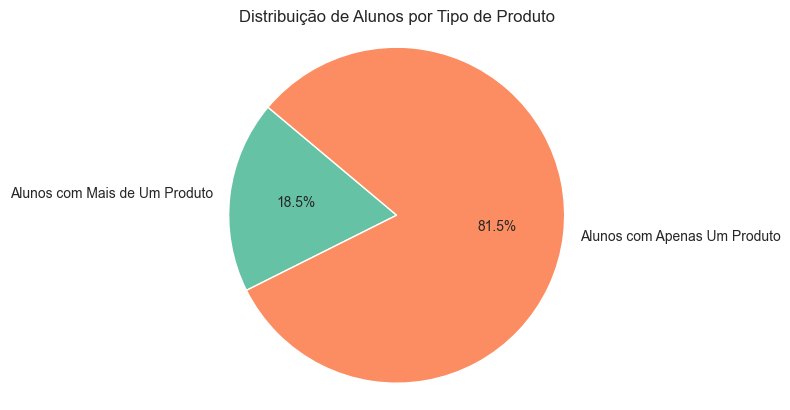

In [18]:
plt.pie(dados_grafico['Quantidade'], labels=dados_grafico['Tipo de Lunos'], autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribuição de Alunos por Tipo de Produto')
plt.axis('equal')
plt.show()